In [1]:
pickles = {}
os.system('ls ../model_spectra/pickles/*.fits > list')
with open('list') as a:
    z = a.read().splitlines()
for line in z:
    f = fits.getdata(line)
    fhead = fits.getheader(line)
    pickles.update({fhead['COMMENT1'].split(' ')[2]:f})
    
import pickle
pickle.dump(pickles,open('../model_spectra/pickle_models.pkl','wb'))

In [2]:
spt = [key for key in pickles.keys()]
spt

['O5V',
 'O9V',
 'B0V',
 'B1V',
 'B3V',
 'B57V',
 'B8V',
 'B9V',
 'A0V',
 'A2V',
 'A3V',
 'A5V',
 'A7V',
 'F0V',
 'F2V',
 'F5V',
 'F6V',
 'F8V',
 'G0V',
 'G2V',
 'G5V',
 'G8V',
 'K0V',
 'K2V',
 'K3V',
 'K4V',
 'K5V',
 'K7V',
 'M0V',
 'M1V',
 'M2V',
 'M2.5V',
 'M3V',
 'M4V',
 'M5V',
 'M6V',
 'O8III',
 'B12III',
 'B3III',
 'B5III',
 'B9III',
 'A0III',
 'A3III',
 'A5III',
 'A7III',
 'F0III',
 'F2III',
 'F5III',
 'G0III',
 'G5III',
 'G8III',
 'K0III',
 'K1III',
 'K2III',
 'K3III',
 'K4III',
 'K5III',
 'M0III',
 'M1III',
 'M2III',
 'M3III',
 'M4III',
 'M5III',
 'M6III',
 'M7III',
 'M8III',
 'M9III',
 'M10III']

<IPython.core.display.Javascript object>


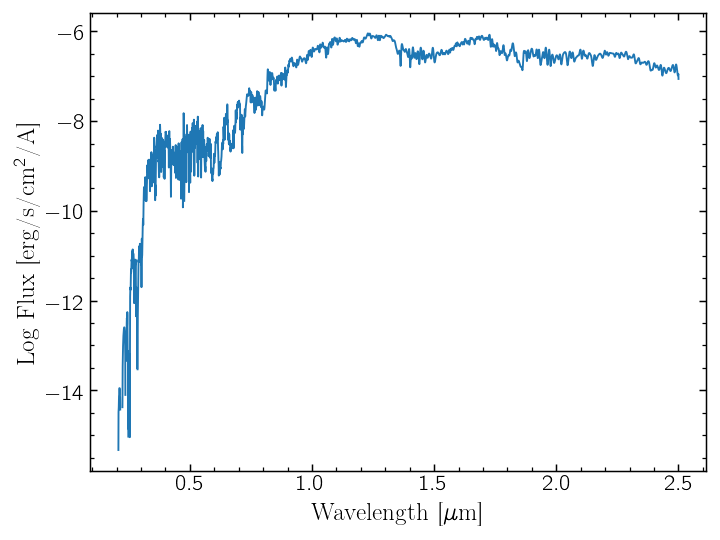

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook
plt.plot(f['wavelength']*u.AA.to(u.um),np.log10(f['flux']))
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel(r'Log Flux [erg/s/cm$^2$/A]')
plt.tight_layout()

In [4]:
f6535 = pd.read_table('../filter_curves/magaox_wfs-open_bs-65-35_atm.dat', comment='#', 
                  names=['wavelength [m]','transmission'], delim_whitespace=True)
f6535['wavelength [nm]'] = f6535['wavelength [m]']*u.m.to(u.nm)
f6535['normalized transmission'] = f6535['transmission']/np.max(f6535['transmission'])

fhair = pd.read_table('../filter_curves/magaox_wfs-open_bs-halpha-ir.dat', comment='#', 
                  names=['wavelength [m]','transmission'], delim_whitespace=True)
fhair['wavelength [nm]'] = fhair['wavelength [m]']*u.m.to(u.nm)
fhair['normalized transmission'] = fhair['transmission']/np.max(fhair['transmission'])
fhair

,wavelength [m],transmission,wavelength [nm],normalized transmission
0,3.990000e-07,0.000000e+00,399.0,0.000000e+00
1,4.000000e-07,1.471580e-09,400.0,7.498994e-09
2,4.010000e-07,1.882230e-09,401.0,9.591616e-09
3,4.020000e-07,1.715430e-09,402.0,8.741624e-09
4,4.030000e-07,3.365860e-09,403.0,1.715202e-08
...,...,...,...,...
697,1.096000e-06,2.995650e-05,1096.0,1.526547e-04
698,1.097000e-06,2.358150e-05,1097.0,1.201685e-04
699,1.098000e-06,1.770760e-05,1098.0,9.023579e-05
700,1.099000e-06,1.305950e-05,1099.0,6.654963e-05


<IPython.core.display.Javascript object>


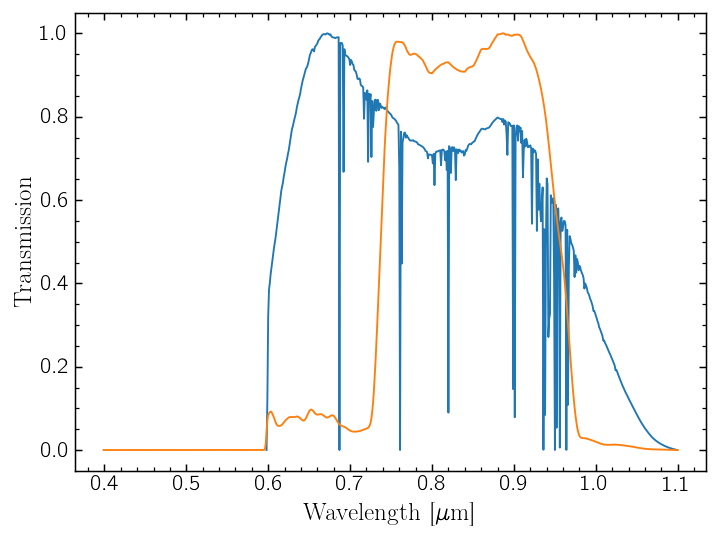

In [5]:
%matplotlib notebook
plt.plot(f6535['wavelength [m]']*u.m.to(u.um),f6535['transmission']/np.max(f6535['transmission']))
plt.plot(fhair['wavelength [m]']*u.m.to(u.um),fhair['transmission']/np.max(fhair['transmission']))
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmission')
plt.tight_layout()

In [6]:
g = pd.read_table('../filter_curves/GaiaEDR3_passbands_zeropoints_version2/passband.dat', comment='#', 
                  names=['wavelength [nm]','G','eG','BP','eBP','RP','eRP'], delim_whitespace=True)
ind = g.loc[np.where(g['BP']==99.99)[0]]
g['BP'].loc[np.where(g['BP']==99.99)[0]] = 0
g['RP'].loc[np.where(g['RP']==99.99)[0]] = 0
g['G'].loc[np.where(g['G']==99.99)[0]] = 0
g

,wavelength [nm],G,eG,BP,eBP,RP,eRP
0,320.0,2.373670e-08,2.341033e-11,0.0,99.99,0.0,99.99
1,321.0,1.577744e-07,1.540369e-10,0.0,99.99,0.0,99.99
2,322.0,9.085548e-07,8.780532e-10,0.0,99.99,0.0,99.99
3,323.0,4.780723e-06,4.573254e-09,0.0,99.99,0.0,99.99
4,324.0,2.394281e-05,2.266986e-08,0.0,99.99,0.0,99.99
...,...,...,...,...,...,...,...
776,1096.0,0.000000e+00,9.999000e+01,0.0,99.99,0.0,99.99
777,1097.0,0.000000e+00,9.999000e+01,0.0,99.99,0.0,99.99
778,1098.0,0.000000e+00,9.999000e+01,0.0,99.99,0.0,99.99
779,1099.0,0.000000e+00,9.999000e+01,0.0,99.99,0.0,99.99


<IPython.core.display.Javascript object>


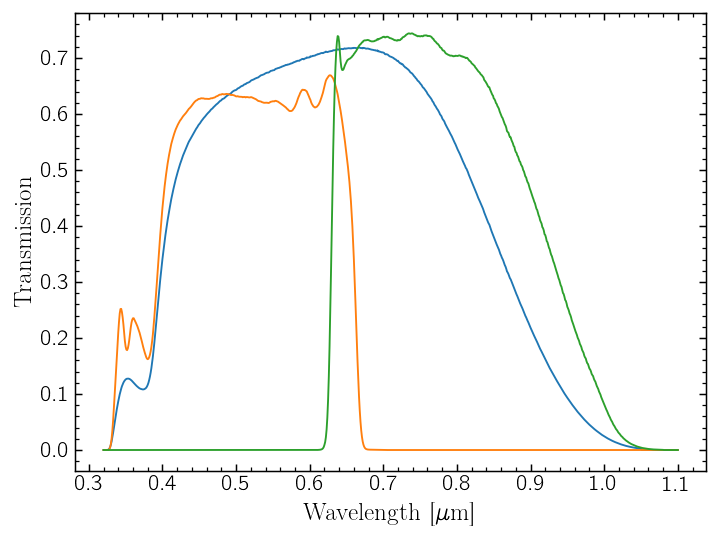

In [7]:
%matplotlib notebook
plt.plot(g['wavelength [nm]']*u.nm.to(u.um),g['G'])
plt.plot(g['wavelength [nm]']*u.nm.to(u.um),g['BP'])
plt.plot(g['wavelength [nm]']*u.nm.to(u.um),g['RP'])
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmission')
plt.tight_layout()

<IPython.core.display.Javascript object>


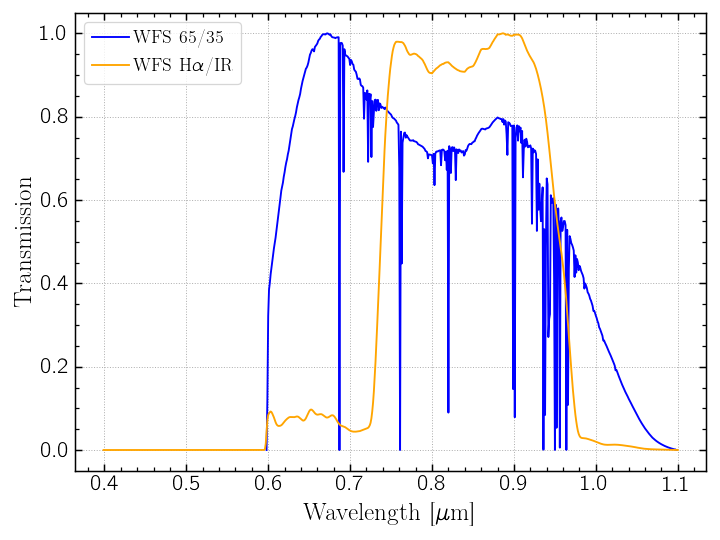

In [8]:
directory = '/Users/loganpearce/Dropbox/Uarizona/research/filter_curves/'

%matplotlib notebook
#plt.plot(g['wavelength [nm]']*u.nm.to(u.um),g['normalized G'], label='Gaia g')
plt.plot(f6535['wavelength [m]']*u.m.to(u.um),f6535['normalized transmission'], label='WFS 65/35', color='blue')
plt.plot(fhair['wavelength [m]']*u.m.to(u.um),fhair['normalized transmission'], label=r'WFS H$\alpha$/IR',color='orange')
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmission')
plt.legend(fontsize=15,loc='upper left')
plt.tight_layout()
plt.grid(ls=':')
plt.savefig('../MagAO-X_public/WFS-curves.png')
plt.savefig(directory+'WFS-curves.png')

<IPython.core.display.Javascript object>


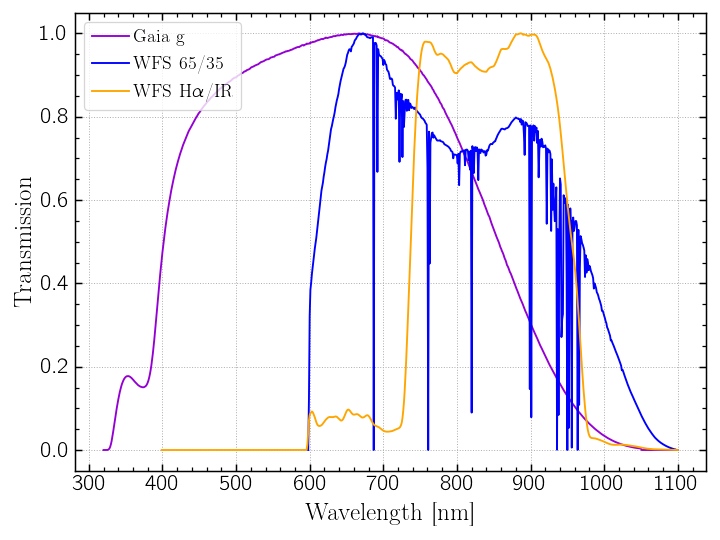

In [10]:
g['normalized G'] = g['G']/np.max(g['G'])
g['normalized BP'] = g['BP']/np.max(g['BP'])
g['normalized RP'] = g['RP']/np.max(g['RP'])

%matplotlib notebook
plt.plot(g['wavelength [nm]'],g['normalized G'], label='Gaia g',color='darkviolet')
plt.plot(f6535['wavelength [nm]'],f6535['normalized transmission'], label='WFS 65/35',color='blue')
plt.plot(fhair['wavelength [nm]'],fhair['normalized transmission'], label=r'WFS H$\alpha$/IR',color='orange')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission')
plt.legend(fontsize=15,loc='upper left')
plt.tight_layout()
plt.grid(ls=':')
plt.savefig('../MagAO-X_public/WFS-Gaia-curves.png')
plt.savefig(directory+'WFS-Gaia-curves.png')

In [11]:
# Determine step sizes for each filter set:
dl_f6535 = np.mean([f6535['wavelength [nm]'][i+1] - f6535['wavelength [nm]'][i] 
           for i in range(1,len(f6535['wavelength [nm]'])-1)])
dl_fhair = np.mean([fhair['wavelength [nm]'][i+1] - fhair['wavelength [nm]'][i] 
           for i in range(1,len(fhair['wavelength [nm]'])-1)])
dl_g = np.mean([g['wavelength [nm]'][i+1] - g['wavelength [nm]'][i] 
           for i in range(1,len(g['wavelength [nm]'])-1)])

# Determine effective wavelength:
GaiaG_lambda0 = np.sum(g['wavelength [nm]']*g['normalized G']* dl_g)/ \
            np.sum(g['normalized G']* dl_g)
GaiaBP_lambda0 = np.sum(g['wavelength [nm]']*g['normalized BP']* dl_g)/ \
            np.sum(g['normalized BP']* dl_g)
GaiaRP_lambda0 = np.sum(g['wavelength [nm]']*g['normalized RP']* dl_g)/ \
            np.sum(g['normalized RP']* dl_g)
f6535_lambda0 = np.sum(f6535['wavelength [nm]']*f6535['normalized transmission']* dl_f6535)/ \
            np.sum(f6535['normalized transmission']* dl_f6535)
fhair_lambda0 = np.sum(fhair['wavelength [nm]']*fhair['normalized transmission']* dl_fhair)/ \
            np.sum(fhair['normalized transmission']* dl_fhair)

In [12]:
dl_f6535 = np.mean([f6535['wavelength [nm]'][i+1] - f6535['wavelength [nm]'][i] 
           for i in range(1,len(f6535['wavelength [nm]'])-1)])
dl_fhair = np.mean([fhair['wavelength [nm]'][i+1] - fhair['wavelength [nm]'][i] 
           for i in range(1,len(fhair['wavelength [nm]'])-1)])
dl_g = np.mean([g['wavelength [nm]'][i+1] - g['wavelength [nm]'][i] 
           for i in range(1,len(g['wavelength [nm]'])-1)])
dl_g,dl_f6535,dl_fhair

(1.0, 0.9999999999999998, 1.0)

In [13]:
k = fits.getdata(z[0])
k_wavenm = k['wavelength']*u.AA.to(u.nm)

from scipy.interpolate import interp1d
spl = interp1d(k_wavenm, k['flux'])

F_lambda0_g = spl(GaiaG_lambda0)
F_lambda0_bp = spl(GaiaBP_lambda0)
F_lambda0_rp = spl(GaiaRP_lambda0)
F_lambda0_f6535 = spl(f6535_lambda0)
F_lambda0_fhair = spl(fhair_lambda0)

# Colors:
GaiaG_to_f6535 = -2.5*np.log10(F_lambda0_g) - (-2.5*np.log10(F_lambda0_f6535))
GaiaG_to_fhair = -2.5*np.log10(F_lambda0_g) - (-2.5*np.log10(F_lambda0_fhair))
GaiaBP_RP = -2.5*np.log10(F_lambda0_bp) - (-2.5*np.log10(F_lambda0_rp))
print(GaiaBP_RP, GaiaG_to_f6535, GaiaG_to_fhair)

-1.7532864681297404 -0.913168607991345 -1.1443593022930152


In [14]:
from scipy.interpolate import interp1d

G6535_colors = np.array([])
GHaIR_colors = np.array([])
BPRP_colors = np.array([])

for SpT in spt:
    k = pickles[SpT]
    k_wavenm = k['wavelength']*u.AA.to(u.nm)

    from scipy.interpolate import interp1d
    spl = interp1d(k_wavenm, k['flux'])

    F_lambda0_g = spl(GaiaG_lambda0)
    F_lambda0_bp = spl(GaiaBP_lambda0)
    F_lambda0_rp = spl(GaiaRP_lambda0)
    F_lambda0_f6535 = spl(f6535_lambda0)
    F_lambda0_fhair = spl(fhair_lambda0)

    # Colors:
    GaiaG_to_f6535 = -2.5*np.log10(F_lambda0_g) - (-2.5*np.log10(F_lambda0_f6535))
    GaiaG_to_fhair = -2.5*np.log10(F_lambda0_g) - (-2.5*np.log10(F_lambda0_fhair))
    GaiaBP_RP = -2.5*np.log10(F_lambda0_bp) - (-2.5*np.log10(F_lambda0_rp))
    
    G6535_colors = np.append(G6535_colors, GaiaG_to_f6535)
    GHaIR_colors = np.append(GHaIR_colors, GaiaG_to_fhair)
    BPRP_colors = np.append(BPRP_colors, GaiaBP_RP)

p_wfs = pd.DataFrame()
p_wfs['SpT'],p_wfs['Gaia BP-RP'],p_wfs['G - 65/35 color'],p_wfs['G - Ha/IR color'] = spt,BPRP_colors,\
                G6535_colors, GHaIR_colors
p_wfs

,SpT,Gaia BP-RP,G - 65/35 color,G - Ha/IR color
0,O5V,-1.753286,-0.913169,-1.144359
1,O9V,-1.759123,-0.876533,-1.122929
2,B0V,-1.691478,-0.858265,-1.115505
3,B1V,-1.576876,-0.816744,-1.074639
4,B3V,-1.522363,-0.769310,-0.973999
...,...,...,...,...
63,M6III,2.861989,1.167731,1.838463
64,M7III,3.690518,1.445635,2.439192
65,M8III,4.309958,1.565400,2.786293
66,M9III,4.147218,1.428649,2.673833


In [15]:
dwarfs = [i for i in p_wfs['SpT'] if 'V' in i]
giants = [i for i in p_wfs['SpT'] if 'III' in i]

dwarfs_colors = [p_wfs['G - 65/35 color'][i] for i in range(len(dwarfs))]
giants_colors = [p_wfs['G - 65/35 color'][i] for i in range(len(dwarfs),len(p_wfs))]
dwarfs_gaia_colors = [p_wfs['Gaia BP-RP'][i] for i in range(len(dwarfs))]
giants_gaia_colors = [p_wfs['Gaia BP-RP'][i] for i in range(len(dwarfs),len(p_wfs))]

dwarfs_colors2 = [p_wfs['G - Ha/IR color'][i] for i in range(len(dwarfs))]
giants_colors2 = [p_wfs['G - Ha/IR color'][i] for i in range(len(dwarfs),len(p_wfs))]


In [16]:
spt_letter_conv = {'O':0,'B':1,'A':2,'F':3,'G':4,'K':5,'M':6}

spt_numbers = np.array([])
for s in spt:
    letter = s[0]
    number = spt_letter_conv[letter]
    
    type_number = np.float(s[1]) / 10
    
    spt_numbers = np.append(spt_numbers,number + type_number)
    
spt_numbers[-1] = 7.0
spt_numbers[5] = 1.6
spt_numbers_dwarfs = spt_numbers[range(len(dwarfs))]
spt_numbers_giants = spt_numbers[range(len(dwarfs),len(spt_numbers))]
spt_numbers_dwarfs,spt_numbers_giants

(array([0.5, 0.9, 1. , 1.1, 1.3, 1.6, 1.8, 1.9, 2. , 2.2, 2.3, 2.5, 2.7,
        3. , 3.2, 3.5, 3.6, 3.8, 4. , 4.2, 4.5, 4.8, 5. , 5.2, 5.3, 5.4,
        5.5, 5.7, 6. , 6.1, 6.2, 6.2, 6.3, 6.4, 6.5, 6.6]),
 array([0.8, 1.1, 1.3, 1.5, 1.9, 2. , 2.3, 2.5, 2.7, 3. , 3.2, 3.5, 4. ,
        4.5, 4.8, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 6. , 6.1, 6.2, 6.3, 6.4,
        6.5, 6.6, 6.7, 6.8, 6.9, 7. ]))

In [17]:
p_wfs['SpT Number'] = spt_numbers
p_wfs.to_csv('GaiaG_WFS_color_conversion.csv',index=False)
p_wfs.to_csv(directory+'GaiaG_WFS_color_conversion.csv',index=False)
p_wfs

,SpT,Gaia BP-RP,G - 65/35 color,G - Ha/IR color,SpT Number
0,O5V,-1.753286,-0.913169,-1.144359,0.5
1,O9V,-1.759123,-0.876533,-1.122929,0.9
2,B0V,-1.691478,-0.858265,-1.115505,1.0
3,B1V,-1.576876,-0.816744,-1.074639,1.1
4,B3V,-1.522363,-0.769310,-0.973999,1.3
...,...,...,...,...,...
63,M6III,2.861989,1.167731,1.838463,6.6
64,M7III,3.690518,1.445635,2.439192,6.7
65,M8III,4.309958,1.565400,2.786293,6.8
66,M9III,4.147218,1.428649,2.673833,6.9


In [18]:
p_wfs[:len(dwarfs)].to_csv('GaiaG_WFS_color_conversion-dwarfs.csv', index=False)
p_wfs[:len(dwarfs)]

,SpT,Gaia BP-RP,G - 65/35 color,G - Ha/IR color,SpT Number
0,O5V,-1.753286,-0.913169,-1.144359,0.5
1,O9V,-1.759123,-0.876533,-1.122929,0.9
2,B0V,-1.691478,-0.858265,-1.115505,1.0
3,B1V,-1.576876,-0.816744,-1.074639,1.1
4,B3V,-1.522363,-0.769310,-0.973999,1.3
5,B57V,-1.414522,-0.708785,-0.919704,1.6
6,B8V,-1.378287,-0.738685,-0.913619,1.8
7,B9V,-1.333443,-0.770971,-0.945338,1.9
8,A0V,-1.299172,-0.680670,-0.882710,2.0
9,A2V,-1.243093,-0.669132,-0.853022,2.2


<IPython.core.display.Javascript object>


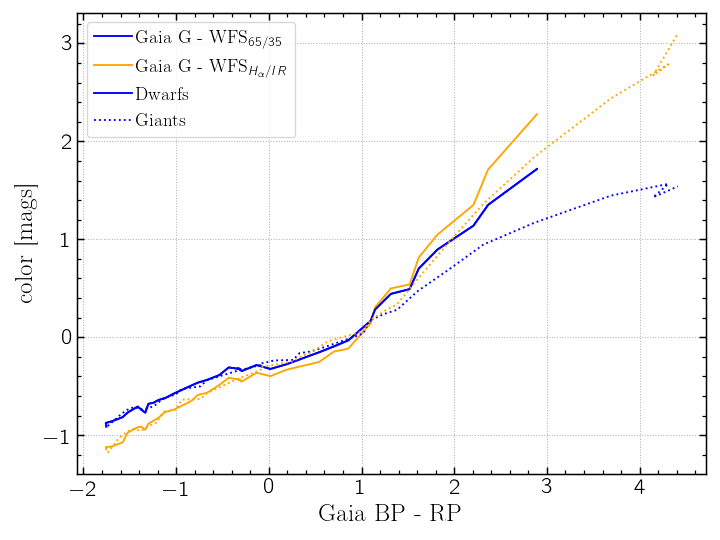

In [19]:
%matplotlib notebook
c=['blue','orange']
plt.plot(dwarfs_gaia_colors,dwarfs_colors, color=c[0],label=r'Gaia G - WFS$_{65/35}$')
plt.plot(dwarfs_gaia_colors,dwarfs_colors2,color=c[1],label=r'Gaia G - WFS$_{H_\alpha/IR}$')

plt.plot(dwarfs_gaia_colors,dwarfs_colors, color=c[0],label=r'Dwarfs')
plt.plot(giants_gaia_colors,giants_colors, color=c[0], ls=':',label=r'Giants')
plt.plot(giants_gaia_colors,giants_colors2,color=c[1], ls=':')

#plt.plot(spt_numbers_dwarfs,dwarfs_colors,color=c[0],label='Dwarf')

#plt.ylim(-2.7,1)
#ticks = np.arange(1,7.5,1)
##labels = ['B0','A0','F0','G0','K0','M0','M10']
#plt.gca().set_xticks(ticks)
#plt.gca().set_xticklabels(labels)
plt.ylabel('color [mags]')
plt.xlabel('Gaia BP - RP')
plt.legend(fontsize=15)

#ax1 = plt.gca()
#ax2 = ax1.twiny()
#lims = ax1.get_xlim()
#ax2.set_xlim(ax1.get_xlim())
#ticks = np.linspace(lims[0],lims[1],7)
#labels = ['B0','A0','F0','G0','K0','M0','M10']
#ax2.set_xticks(ticks)
#ax2.set_xticklabels(labels)

plt.tight_layout()
plt.grid(ls=':')
plt.savefig('GaiaG_to_MagAO-X_WFS_color_conversion-ByBPRPcolor.png',dpi=300)
plt.savefig(directory+'GaiaG_to_MagAO-X_WFS_color_conversion-ByBPRPcolor.png',dpi=300)
plt.show()

<IPython.core.display.Javascript object>


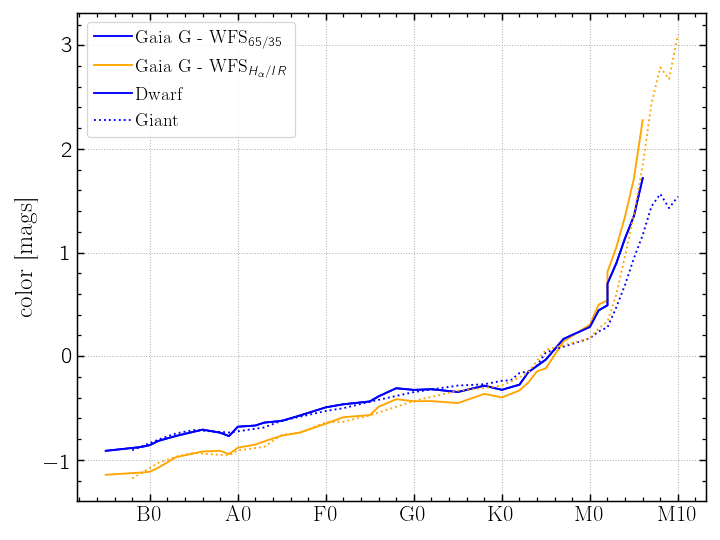

In [20]:
%matplotlib notebook
c=['blue','orange']
plt.plot(spt_numbers_dwarfs,dwarfs_colors,color=c[0],label='Gaia G - WFS$_{65/35}$')
plt.plot(spt_numbers_dwarfs,dwarfs_colors2,color=c[1],label=r'Gaia G - WFS$_{H_\alpha/IR}$')

plt.plot(spt_numbers_dwarfs,dwarfs_colors,color=c[0],label='Dwarf')
plt.plot(spt_numbers_giants,giants_colors,color=c[0],ls=':',label = 'Giant')
plt.plot(spt_numbers_giants,giants_colors2,color=c[1],ls=':')

#plt.ylim(-2.7,1)
ticks = np.arange(1,7.5,1)
labels = ['B0','A0','F0','G0','K0','M0','M10']
plt.gca().set_xticks(ticks)
plt.gca().set_xticklabels(labels)
plt.ylabel('color [mags]')
plt.legend(fontsize=15)

#ax1 = plt.gca()
#ax2 = ax1.twiny()
#ax2.set_xlim(ax1.get_xlim())
#ax2.set_xticks(p_wfs['Gaia BP-RP'])

plt.tight_layout()
plt.grid(ls=':')
plt.savefig('GaiaG_to_MagAO-X_WFS_color_conversion.png',dpi=300)
plt.savefig(directory+'GaiaG_to_MagAO-X_WFS_color_conversion.png',dpi=300)
plt.show()